## HW1: Logistic regression and Linear Regression using Gradient Descent
In hw1, you need to implement linear regression by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get no points by simply calling sklearn.linear_model.LinearRegression

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# Part 1. Linear regression model

## Load regression data

In [2]:
from ctypes import sizeof
from turtle import shape


x_train, x_test, y_train, y_test = np.load('regression_data.npy', allow_pickle=True)
y_train = np.expand_dims(y_train, axis=1) # make shape=(750, 1)

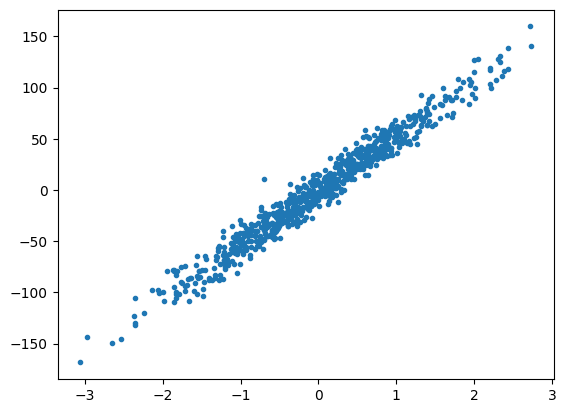

In [3]:
plt.plot(x_train, y_train, '.')

## Train your model 
### Pseudo code:
1. Random initialize the weights, intercepts of the linear model

**for i in range(iteration)**

    2. Feed foward the training data into the model, get the output prediction
    3. Calculating training loss by Mean Square Error of predcition and ground truth data
    4. Calculating the gradients
    5. Updating the weights and intercepts by the gradients * learning rate 
    
**End of training**

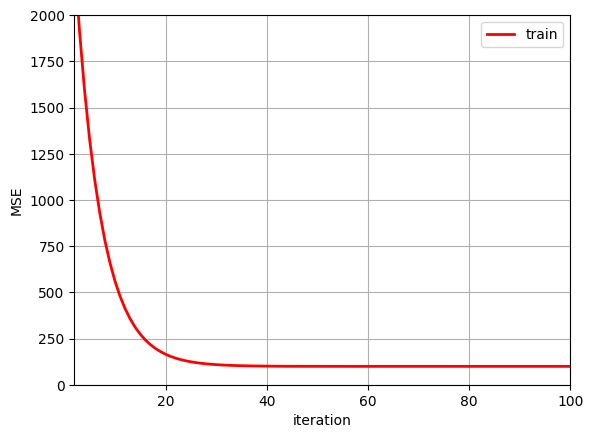

In [4]:

 
intercept, weight = np.random.randn(2,1) # random initalize weight and intercept
def function(x, weight, intercept): # y = weight*x+intercept
    y_pred = x.dot(weight)+intercept
    return y_pred


def Mean_square_error(y, y_pred): #MSE = mean(sum((pred-y)^2))
    square_sum = np.square(np.subtract(y_pred, y))
    return (np.mean(square_sum))


def gradient(x, y, learning_rate, iter, intercept, weight):
    train_err = np.zeros(iter) #store error of each iteration for learning curve
    for i in range(iter):
        pred = function(x, weight, intercept) # predict y by x, intercept and weight
        pred = np.expand_dims(pred, axis=1)
        train_err[i] = Mean_square_error(y, pred) # store error
        D_weight = np.sum(np.multiply(x, np.subtract(pred, y)))*(2/len(x)) # get weight direction
        D_intercept = np.sum(np.subtract(pred, y))*(2/len(x)) # get intercept direction
        weight -= D_weight*learning_rate # update weight direction
        intercept -= D_intercept*learning_rate # update intercept direction
    plt.plot(range(2, iter + 1), train_err[1:], c="r", linewidth=2) # draw learning curve
    plt.xlabel("iteration", fontsize=10)
    plt.ylabel("MSE", fontsize=10)
    plt.legend(["train"], loc="best")
    plt.axis([2, iter, 0, 2000])
    plt.grid()

gradient(x_train, y_train, 0.05, 100, intercept, weight) # train

def linear_regression_model(x_test): # function to use model
    y_pred = function(x_test, weight, intercept)
    plt.plot(x_train, y_train, '.')
    plt.plot(x_test, y_pred, '.')
    print("Intercept: ", intercept[0])
    print("Weight: ", weight[0])
    return y_pred

    

## Test the performance on the testing data
Inference the test data (x_test) by your model and calculate the loss of (y_test, y_pred)

Intercept:  -0.3342562876206888
Weight:  52.74042168827203
Mean square error:  110.42856148974472


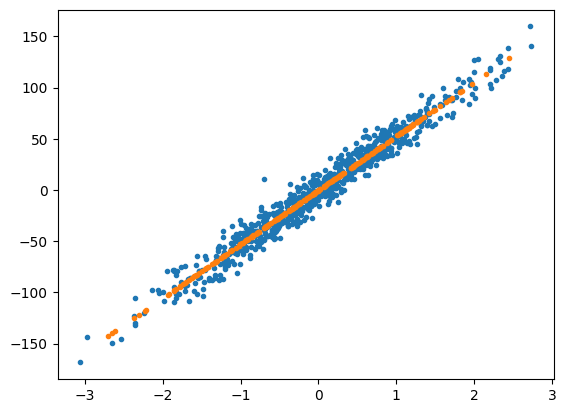

In [5]:
y_pred = linear_regression_model(x_test)
print("Mean square error: ",Mean_square_error(y_test, y_pred))

# Part 2. Logistic regreesion model

## Load classification data

In [6]:
x_train, x_test, y_train, y_test = np.load('classification_data.npy', allow_pickle=True)
y_train = np.expand_dims(y_train, axis=1) # make shape=(750, 1)
y_test = np.expand_dims(y_test, axis=1)

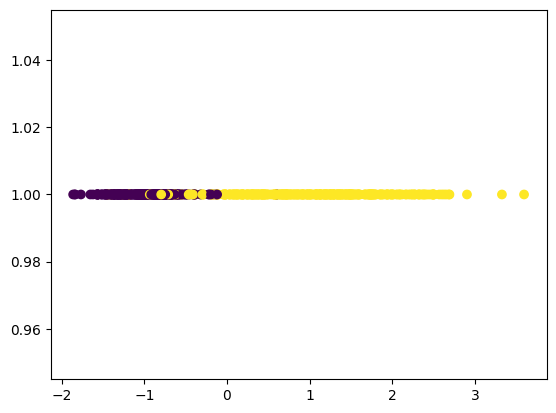

In [7]:
plt.scatter(x_train, np.ones_like(x_train), c=y_train)

## Train your model 
### Pseudo code:
1. Random initialize the weights, intercepts of the linear model

**for i in range(iteration)**

    2. Feed foward the training data into the model, get the output prediction
    3. Calculating training loss by Cross entrooy Error of predcition and ground truth data
    4. Calculating the gradients
    5. Updating the weights and intercepts by the gradients * learning rate 
    
**End of training**

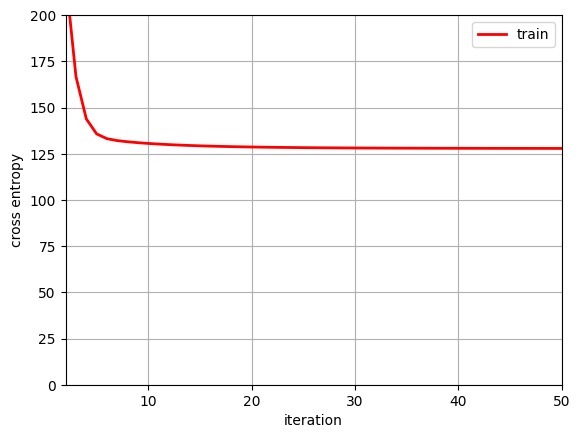

In [8]:
intercept, weight = np.random.randn(2,1) 

def sigmoid(z): #sigmoid function 1/(1+e^(-z))
    return 1/(1+np.exp(-z))

def cross_entropy(y_pred,y): #cross entropy -sum((y*log(pred))+((1-y)*log(1-pred)))
    return -(np.sum(y*np.log(y_pred)+(1-y)*np.log(1-y_pred)))

def gradient(x, y, learning_rate, iter, intercept, weight): 
    train_err = np.zeros(iter) #store error of each iteration for learning curve
    for i in range(iter):
        z = x*weight+intercept 
        pred = sigmoid(z) # prediction = sigmoid(x*weight+intercept)
        loss = cross_entropy(pred, y) # loss = cross entropy of prediction and y
        train_err[i] = cross_entropy(pred, y) # store loss
        D_intercept = np.sum((np.subtract(pred, y))) # get intercept direction 
        D_weight = np.sum((np.subtract(pred, y))*x) # get weight direction
        weight -= learning_rate*D_weight # update weight direction 
        intercept -= learning_rate*D_intercept # update intercept direction
    plt.plot(range(2, iter + 1), train_err[1:], c="r", linewidth=2) # draw learning curve
    plt.xlabel("iteration", fontsize=10)
    plt.ylabel("cross entropy", fontsize=10)
    plt.legend(["train"], loc="best")
    plt.axis([2, iter, 0, 200])
    plt.grid()

gradient(x_train, y_train, 0.01, 50, intercept, weight) # function to use model 
def logistic_regression_model(x_test):
    y_pred = sigmoid(x_test*weight+intercept)
    print("Intercept: ", intercept[0])
    print("Weight: ", weight[0])
    return y_pred


In [9]:
#y_test = np.expand_dims(y_test, axis=1)
y_pred = logistic_regression_model(x_test)
print("Cross entropy: ",cross_entropy( y_pred,y_test))

Intercept:  1.6450662431459526
Weight:  4.767618985512894
Cross entropy:  46.880976139500774
